## Camera Images Concentrate
Alf said that, e.g. `1000x1000` images, when viewed as vectors in $\mathbb{R}^{10^6}\,$, do not scatter a large region of the space; instead, they seem to "_concentrate in a small corner_".

Let's verify the validity of this statement.

I propose two datasets that we can use to the end

- Kaggle's `dogs-vs-cats` dataset
  - Download the Kaggle `dogs-vs-cats` dataset from [here (kaggle's website)](https://www.kaggle.com/c/dogs-vs-cats/data)
- ImageNet
  - PyTorch provides no downloading of ImageNet. It only provides some kind of an ImageNet data loader: <https://stackoverflow.com/questions/60607824/pytorch-imagenet-dataset>
  - TensorFlow does provide (downloading) ImageNet. I choose to use this one: <https://www.tensorflow.org/datasets/catalog/imagenet_resized>



In [93]:
import torchvision.datasets

In [1]:
from pathlib import Path
path_dataset = Path.home() / "datasets/kaggle/dogs-vs-cats/train"
path_dataset.exists()

True

In [3]:
list(path_dataset.iterdir())[:5]

[PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/cat.10309.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/cat.7641.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.1658.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.10645.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.2679.jpg')]

In [84]:
import random
#random.seed(2)    # neither dog nor cat
#random.seed(127)  # a funny dog
random.seed(27)    # a sad dog
path_random_image = random.choice(list(path_dataset.iterdir()))
path_random_image

PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.2426.jpg')

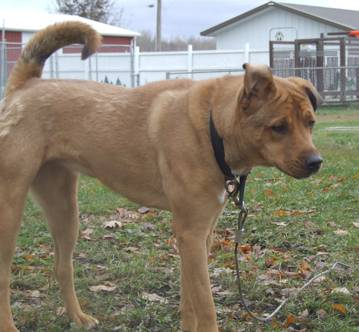

In [86]:
from IPython import display
display.Image(filename=path_random_image, width=200)

In [89]:
import cv2
image_random = cv2.imread(str(path_random_image))
image_random.shape, image_random.dtype

((332, 359, 3), dtype('uint8'))

### `shape` all the same?
Nope.

In [91]:
from PIL import Image
n_shown = 10
for i, p in enumerate(path_dataset.iterdir()):
    if i >= n_shown:
        break
    w, h = Image.open(p).size
    print(f"w, h = ({w}, {h})")

w, h = (500, 271)
w, h = (499, 334)
w, h = (292, 390)
w, h = (316, 499)
w, h = (500, 439)
w, h = (499, 295)
w, h = (500, 451)
w, h = (264, 244)
w, h = (499, 375)
w, h = (357, 335)


Here's how I am going to measure the distance btw normal pictures and random RGB images:
> - Randomly choose one real image
> - Randomly choose another, say, `100` images
> - Randomly generate another `100` RGB images
> - Calculate the max, mean distances of the two groups of images to the first chosen image

In [107]:
L_101_paths = random.sample(list(path_dataset.iterdir()), k=101)

In [114]:
uniform_size = (500, 400)  # determined arbitrarily
image_fixed = cv2.resize(cv2.imread(str(L_101_paths[0])), uniform_size)
image_fixed.shape, image_fixed.dtype

((400, 500, 3), dtype('uint8'))

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
L_distance_type_1 = []
for p in L_101_paths[1:]:
    image = cv2.resize(cv2.imread(str(p)), uniform_size)
    L_distance_type_1.append(np.linalg.norm(image_fixed.reshape((-1,)) - image.reshape((-1,))))
max(L_distance_type_1), sum(L_distance_type_1) / len(L_distance_type_1)

(137091.21116614295, 113043.83232386282)

In [117]:
L_distances_type_2 = []
for _ in range(100):
    image = np.random.randint(0, 256, size=(*(uniform_size[::-1]), 3), dtype=np.uint8)
    L_distances_type_2.append(np.linalg.norm(image_fixed.reshape((-1,)) - image.reshape((-1,))))
max(L_distances_type_2), sum(L_distances_type_2) / len(L_distances_type_2)

(114312.1164312865, 114153.13555624722)

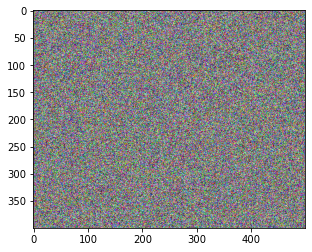

In [120]:
image = np.random.randint(0, 256, size=(*(uniform_size[::-1]), 3), dtype=np.uint8)
plt.imshow(image);